In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
tf.compat.v1.disable_eager_execution()
import matplotlib.pyplot as plt
import numpy as np
import random

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/",one_hot = True)

Instructions for updating:
Please use alternatives such as: tensorflow_datasets.load('mnist')
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/_DataSet.py from tensorflow/models.


In [3]:
nb_classes = 10
X = tf.placeholder(tf.float32,[None,784])
Y = tf.placeholder(tf.float32,[None,nb_classes])

W = tf.Variable(tf.random_normal([784,nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

EPOCH :  0001 COST =  2.856918569
EPOCH :  0002 COST =  1.093410294
EPOCH :  0003 COST =  0.871394723
EPOCH :  0004 COST =  0.763021825
EPOCH :  0005 COST =  0.694866592
EPOCH :  0006 COST =  0.646309726
EPOCH :  0007 COST =  0.608525513
EPOCH :  0008 COST =  0.579180725
EPOCH :  0009 COST =  0.554634925
EPOCH :  0010 COST =  0.533899011
EPOCH :  0011 COST =  0.516635667
EPOCH :  0012 COST =  0.501392284
EPOCH :  0013 COST =  0.488146193
EPOCH :  0014 COST =  0.476122531
EPOCH :  0015 COST =  0.465411027
Label: [1]
Prediction: [1]


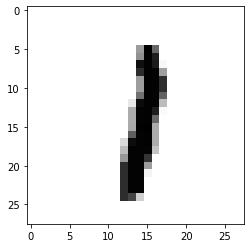

accuracy 0.8862


In [5]:
hypothesis = tf.nn.softmax(tf.matmul(X,W)+b)
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis),axis =1 ))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

is_correct = tf.equal(tf.arg_max(hypothesis,1),tf.arg_max(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))

training_epochs = 15
batch_size = 100

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c,_ = sess.run([cost,optimizer],feed_dict = {X:batch_xs,Y:batch_ys})
            avg_cost += c/total_batch
        
        print("EPOCH : ","%04d"%(epoch + 1),"COST = ","{:.9f}".format(avg_cost))
    
    r = random.randint(0,mnist.test.num_examples-1 )
    print("Label:",sess.run(tf.arg_max(mnist.test.labels[r:r+1],1)))
    print("Prediction:",sess.run(tf.arg_max(hypothesis,1),feed_dict = {X:mnist.test.images[r:r+1]}))

    plt.imshow(mnist.test.images[r:r+1].reshape(28,28),cmap='Greys',interpolation='nearest')
    plt.show()
    print("accuracy",sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))